In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
results = list(Path('results').rglob('canary-*-epochs-*.json'))
results

[PosixPath('results/canary-5-epochs-iqtde.json')]

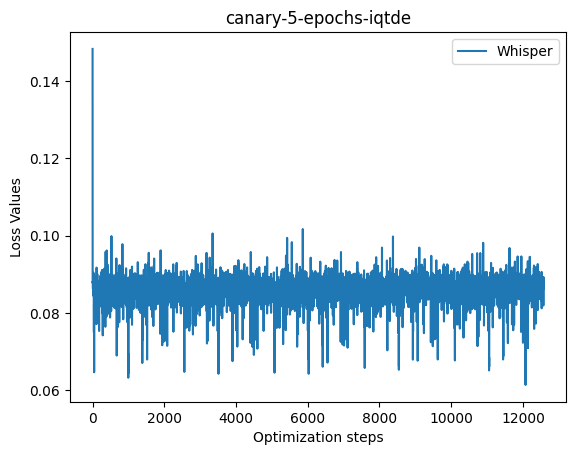

In [3]:
for file in results:
    with open(file) as f:
        info = json.load(f)

    if 'whisper' in file.name:
        with open('results/'+file.name.replace('whisper', 'canary')) as f:
            can_info = json.load(f)
        plt.plot(can_info['losses'], label='Canary')

    plt.plot(info['losses'], label='Whisper')
    plt.ylabel('Loss Values')
    plt.xlabel('Optimization steps')
    plt.title(file.name.removesuffix('.json'))
    plt.legend()
    plt.show()